Final code of out project

Imports

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Outliers removing function

In [1]:
def remove_outliers(df, columns, multiplier):
    for col in columns:  # Only for numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for non-outliers
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Keep only non-outlier rows
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

Loading the 1st dataset

In [6]:
df_A = pd.read_csv("../data/DataA.csv", header = 0, sep =",")
df_A.info()
df_A.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 120 entries, recordid to UrineOutputSum
dtypes: float64(111), int64(9)
memory usage: 3.7 MB


,recordid,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,Age,Gender,Height,Weight,...,SysABP_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
0,132539,6,1,5,-1,0,54.0,0.0,NaN,NaN,...,NaN,NaN,NaN,9.4,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,8,-1,0,76.0,1.0,175.3,76.0,...,103.0,NaN,NaN,13.3,81.6,7.37,71.0,360.0,0.0,5.0
2,132541,21,11,19,-1,0,44.0,0.0,NaN,56.7,...,126.0,NaN,NaN,6.2,56.7,7.47,617.0,2160.0,1.0,14.0
3,132543,7,1,9,575,0,68.0,1.0,180.3,84.6,...,NaN,NaN,NaN,7.9,84.6,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,4,918,0,88.0,0.0,NaN,NaN,...,NaN,NaN,NaN,4.8,NaN,NaN,NaN,NaN,NaN,NaN


Loading the 2nd dataset

In [7]:
df_B = pd.read_csv("../data/DataB.csv", header = 0, sep =",")
df_B.info()
df_B.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 120 entries, recordid to UrineOutputSum
dtypes: float64(111), int64(9)
memory usage: 3.7 MB


,recordid,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,Age,Gender,Height,Weight,...,SysABP_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
0,142675,27,14,9,7,1,70.0,1.0,175.3,85.0,...,105.0,NaN,NaN,6.1,NaN,7.38,99.0,2559.0,1.0,13.0
1,142676,12,1,31,468,0,57.0,0.0,NaN,NaN,...,NaN,NaN,NaN,15.1,NaN,NaN,NaN,NaN,NaN,NaN
2,142680,12,7,17,16,1,60.0,1.0,182.9,78.8,...,104.0,NaN,NaN,17.6,79.5,7.45,207.0,2570.0,1.0,20.0
3,142683,19,15,17,-1,0,64.0,1.0,180.3,145.2,...,140.0,NaN,NaN,18.3,NaN,7.36,374.0,2420.0,1.0,14.0
4,142688,3,0,9,-1,0,51.0,1.0,172.7,90.0,...,107.0,NaN,NaN,12.5,NaN,7.37,NaN,NaN,NaN,NaN


Merging

In [8]:
df = pd.concat([df_A, df_B], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 0 to 3999
Columns: 120 entries, recordid to UrineOutputSum
dtypes: float64(111), int64(9)
memory usage: 7.4 MB


Checking for the missing values

In [11]:
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

recordid                0
SAPS-I                  0
SOFA                    0
Length_of_stay          0
Survival                0
                     ... 
pH_last              1932
MechVentStartTime    2960
MechVentDuration     2960
MechVentLast8Hour    2960
UrineOutputSum       2960
Length: 120, dtype: int64


Playing with threshold to remove columns with a lof of missing values

In [13]:
threshold_columns = 0.7 * len(df) #this means that if col bellow 70% of Not-NaN values - it will be removed

# Drop columns with missing values exceeding the threshold
df_clean_col = df.dropna(axis=1, thresh=threshold_columns)
df_clean_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 0 to 3999
Data columns (total 71 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   recordid           8000 non-null   int64  
 1   SAPS-I             8000 non-null   int64  
 2   SOFA               8000 non-null   int64  
 3   Length_of_stay     8000 non-null   int64  
 4   Survival           8000 non-null   int64  
 5   In-hospital_death  8000 non-null   int64  
 6   Age                8000 non-null   float64
 7   Gender             7992 non-null   float64
 8   Weight             7319 non-null   float64
 9   CCU                8000 non-null   int64  
 10  CSRU               8000 non-null   int64  
 11  SICU               8000 non-null   int64  
 12  GCS_first          7871 non-null   float64
 13  Glucose_first      7799 non-null   float64
 14  HR_first           7872 non-null   float64
 15  NIDiasABP_first    6999 non-null   float64
 16  NIMAP_first        6996 non-n

In [14]:
threshold_columns = 0.3 * len(df) #this means that if col bellow 70% of Not-NaN values - it will be removed

# Drop columns with missing values exceeding the threshold
df_clean_col_2 = df.dropna(axis=1, thresh=threshold_columns)
df_clean_col_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 0 to 3999
Columns: 109 entries, recordid to UrineOutputSum
dtypes: float64(100), int64(9)
memory usage: 6.7 MB


Threshold in 70% still lets us keep a lot of useful columns, so we can use *df_clean_col* dataframe in the next steps

_______________________________________________________

Removing NaN *In-hospital_death* column values

In [16]:
df_clean_row = df_clean_col.dropna(subset=['In-hospital_death'])

Removing duplicating rows

In [17]:
df_clean_row.drop_duplicates()

Finally, removing the not-necessary *recordid* column, as well as 'Survival' column with almost duplicating meaning as *In-hospital_death*

In [19]:
df_clean.drop(columns=['recordid', 'Survival'])

,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,Age,Gender,Weight,CCU,CSRU,...,HCO3_last,HCT_last,K_last,Mg_last,Na_last,PaCO2_last,PaO2_last,Platelets_last,WBC_last,pH_last
0,6,1,5,-1,0,54.0,0.0,NaN,0,0,...,28.0,30.3,4.0,1.9,136.0,NaN,NaN,185.0,9.4,NaN
1,16,8,8,-1,0,76.0,1.0,76.00,0,1,...,24.0,29.4,3.5,1.9,135.0,46.0,140.0,135.0,13.3,7.37
2,21,11,19,-1,0,44.0,0.0,56.70,0,0,...,25.0,29.4,3.7,1.7,138.0,37.0,173.0,113.0,6.2,7.47
3,7,1,9,575,0,68.0,1.0,84.60,0,0,...,28.0,36.3,3.8,1.9,137.0,NaN,NaN,284.0,7.9,NaN
4,17,2,4,918,0,88.0,0.0,NaN,0,0,...,20.0,30.9,4.1,1.6,139.0,NaN,NaN,97.0,4.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,21,13,6,752,0,78.0,1.0,83.18,0,1,...,20.0,25.0,5.2,1.9,131.0,33.0,120.0,118.0,15.8,7.45
3996,28,14,10,39,0,90.0,1.0,87.00,0,0,...,18.0,31.5,3.8,2.3,140.0,30.0,62.0,191.0,21.4,7.41
3997,12,4,19,334,0,70.0,0.0,74.00,0,1,...,16.0,31.1,3.3,1.8,142.0,34.0,127.0,160.0,15.1,7.35
3998,5,0,12,-1,0,49.0,0.0,57.00,0,0,...,26.0,30.4,4.4,1.5,131.0,53.0,38.0,185.0,16.6,7.36


Basic plots for the most related to our research question and subquestions features

Survival of patients 

C:\Users\HALL 9001\AppData\Local\Temp\ipykernel_25212\3000965519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='In-hospital_death', data=df_clean, palette='bright')


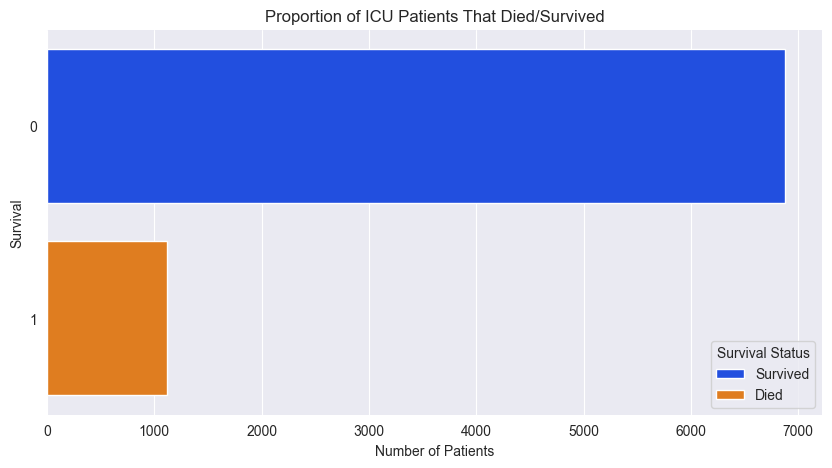

In [68]:
plt.figure(figsize=(10, 5))
sns.countplot(y='In-hospital_death', data=df_clean, palette='bright')
plt.xlabel('Number of Patients')
plt.ylabel('Survival')
plt.title('Proportion of ICU Patients That Died/Survived')
sns.despine(top=True, bottom=True, left=True)
plt.legend(title='Survival Status', labels=['Survived', 'Died'])
plt.show()

Lets review socio-demographic features

In [30]:
df_clean[["Gender", "Age"]].describe()

,Gender,Age
count,7992.000000,8000.000000
mean,0.562938,64.429750
std,0.496054,17.352628
min,0.000000,15.000000
25%,0.000000,53.000000
50%,1.000000,67.000000
75%,1.000000,78.000000
max,1.000000,90.000000


Revealing the distribution for the Age column

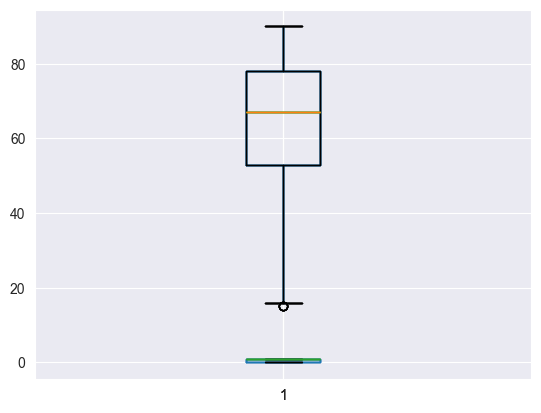

In [33]:
plt.boxplot(df_clean.Age)
plt.show()

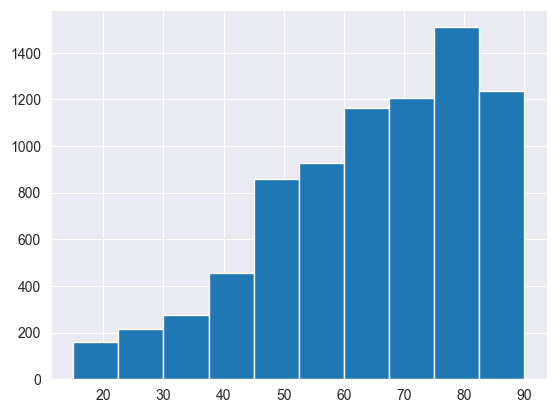

In [44]:
plt.hist(df_clean.Age)
plt.show()

It is very clean that we have skewed data to the aged person. At the same time, based on the specificity of the data, it is understandable, and there is no need to do anything with that feature.

Let's reveal the gender distribution in general, and for each age group

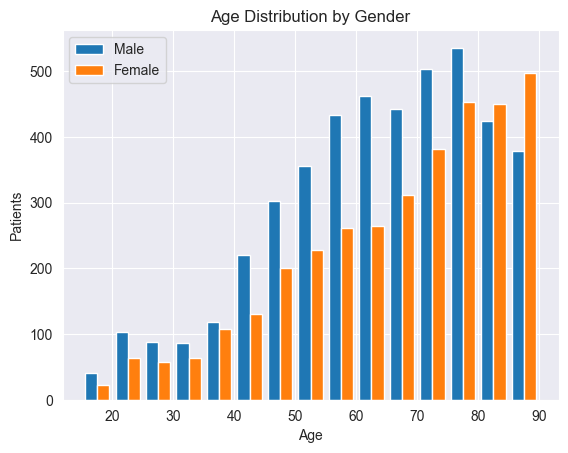

In [55]:
male_ages = df_clean[df_clean['Gender'] == 1]['Age']
female_ages = df_clean[df_clean['Gender'] == 0]['Age']

plt.hist([male_ages, female_ages], label=['Male', 'Female'], bins=15)
plt.xlabel('Age')
plt.ylabel('Patients')
plt.title('Age Distribution by Gender')
plt.legend()
plt.show()

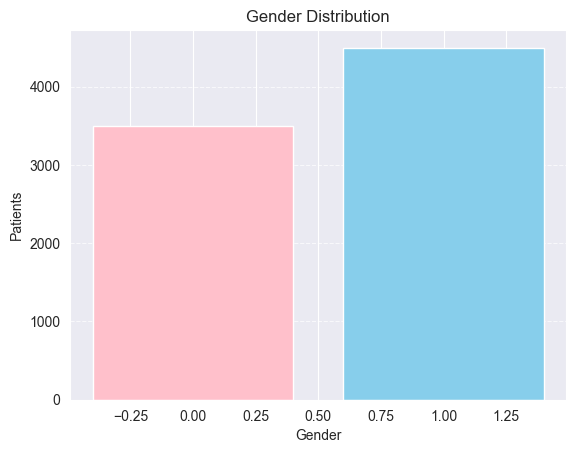

In [62]:
gender_counts = df_clean['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'pink'])

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Patients')

plt.show()

And now it is possible to combine the 3 feature above into 1 graph to try to observe some patterns in survival of patients

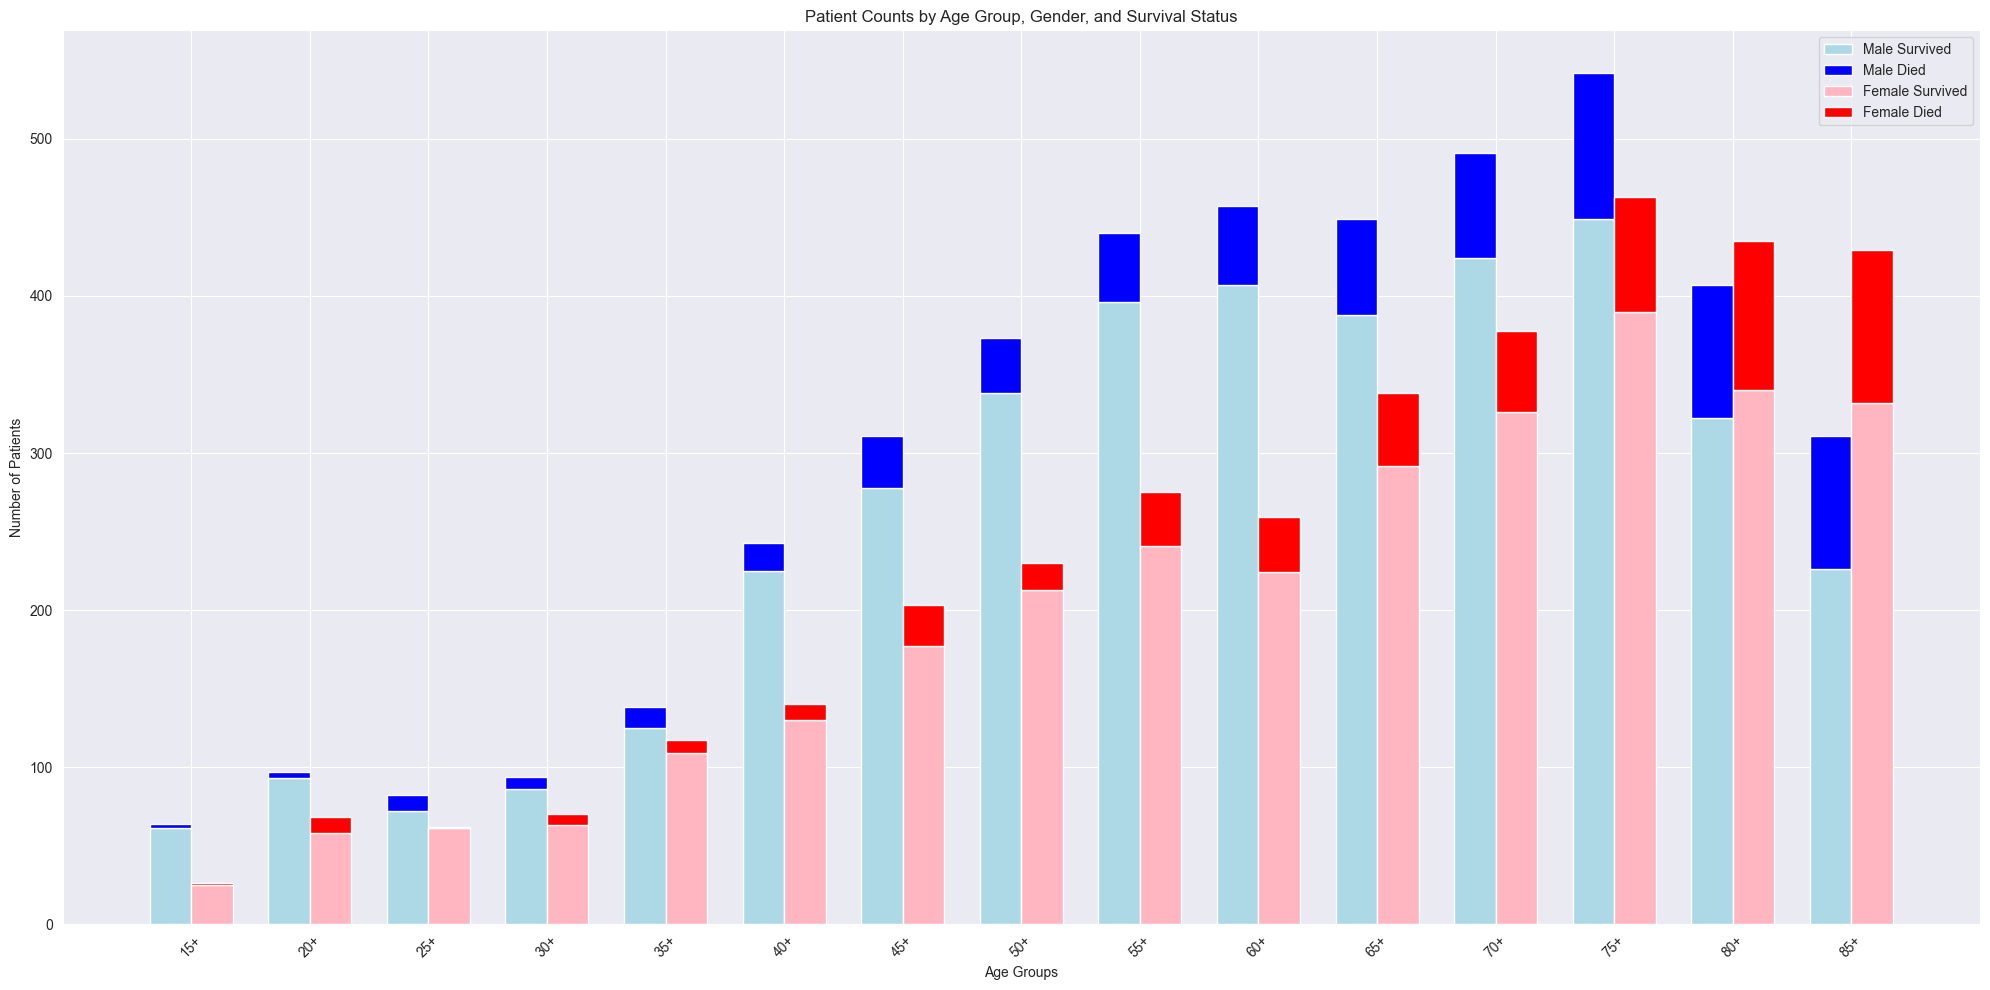

In [76]:
# Create age bins
bins = np.linspace(df_clean['Age'].min(), df_clean['Age'].max(), 15)
labels = ['{}+'.format(int(bins[i])) for i in range(len(bins)-1)]

# Add age group to the dataframe
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, include_lowest=True)

# Create a pivot table with counts
pivot = df_clean.pivot_table(values='In-hospital_death',
                             index='AgeGroup',
                             columns='Gender',
                             aggfunc=['count', 'sum'])

# Prepare data for plotting
male_survived = pivot['count', 1] - pivot['sum', 1]
male_died = pivot['sum', 1]
female_survived = pivot['count', 0] - pivot['sum', 0]
female_died = pivot['sum', 0]

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 10))
x = np.arange(len(labels))
width = 0.35

# Create the stacked bars
ax.bar(x - width/2, male_survived, width, label='Male Survived', color='lightblue')
ax.bar(x - width/2, male_died, width, bottom=male_survived, label='Male Died', color='blue')
ax.bar(x + width/2, female_survived, width, label='Female Survived', color='lightpink')
ax.bar(x + width/2, female_died, width, bottom=female_survived, label='Female Died', color='red')

# Customize the plot
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Age Groups')
ax.set_title('Patient Counts by Age Group, Gender, and Survival Status')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()


plt.tight_layout()
plt.show()
